In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud as wc

In [77]:
path = os.path.join(os.getcwd(), "cpp", "param", "ap")
alpha_path = os.path.join(path, "alpha.dat")
beta_path = os.path.join(path, "beta.dat")

alpha = pd.read_table(alpha_path, sep=" ", header = None)
beta = pd.read_table(beta_path, sep=" ", header = None)

vocab_path = os.path.join(os.getcwd(), "cpp", "datasets", "ap", "vocab.txt" )
vocab = pd.read_table(vocab_path, header=None)

In [78]:
alpha

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [79]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index
    
    if topic < 10:
        print topic, " :" ,
    else:
        print topic , ":" , 
        
    for i in xrange(30):
        print vocab[0].loc[top_words[i]], 
    print
    print

0  : state united research years heart waste symphony officials million new percent milk institute building tunnel department people ago states program orchestra american year director musicians cows hormone report co fda

63 : south korea north korean two roh communist first war games koreas kim remains seoul olympic officials today days visit monday five help states peninsula united delegation unification school field summer

73 : defense barry members pacs i shuster pac moore black case committee corroon last thursday abrams city mayor hotel trip new money cuomo brawley fbi grand four sources islands friday people

72 : cents oil cent futures lower prices higher crude bushel market gasoline gallon trading delivery barrel corn new pound exchange inc soybean mercantile chicago york week july contracts fell wheat analyst

71 : tax percent taxes new income states federal year estate state city property people paid returns plan system electoral cities sales million york country pay cut g

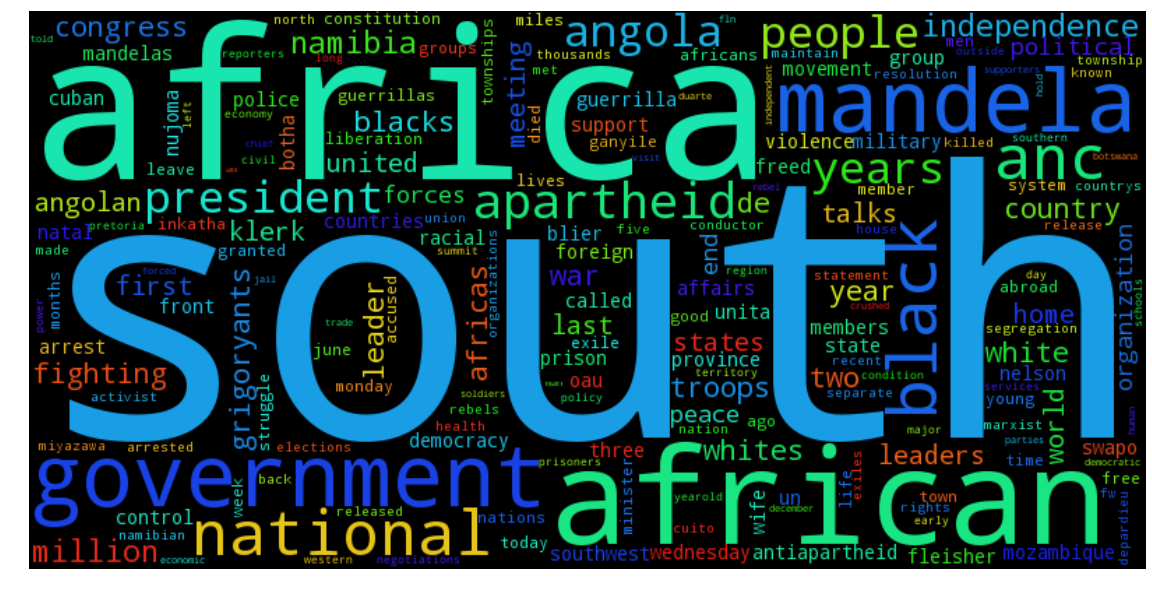

In [85]:
topic = 86
top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
word_list = []
for word_index in top_words:
    if word_index != 0:
        word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
        word_list.append(word_freq)
        
plt.figure(figsize=(20,10))
wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("topic_images/topic86.png")
plt.show()

In [ ]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
    word_list = []
    for word_index in top_words:
        if word_index != 0:
            word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
            word_list.append(word_freq)
    
    if beta.loc[topic].loc[top_words[0]] - beta.loc[topic].loc[top_words[1]] > 0.01:
        image_name = vocab[0].loc[top_words[0]]
    else:
        image_name = vocab[0].loc[top_words[0]]+"_"+vocab[0].loc[top_words[1]]
        
    plt.figure(figsize=(20,10))
    wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("topic_images/"+image_name+".png")
    plt.close()